Music Genre Classification using CNN

In [4]:


import librosa as lb
import os
import json
import math

DATASET  = "E:/Project (ML)/Genre Dataset"    
JSON = "E:/Project (ML)/mfcc_data.json" 

SAMPLE_RATE = 22050
DUR = 30    
SAMPLES = SAMPLE_RATE*DUR



def create_mfcc_data(dataset_path, json_filepath, n_mfcc=13, n_fft=2048, hop_length=512, segments=5):
    
    
    
    data = {
        "mapping" : [],
        "mfcc" : [],
        "label" : []
    }
    
    segment_size = SAMPLES//segments
    mfcc_vectors = math.ceil(segment_size/hop_length)
    
    
    
    for i,(dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        
        if dirpath is not dataset_path:
            
            genre_path = dirpath.split('\\')
            genre = genre_path[-1]
            data["mapping"].append(genre)
            
            print("Processing {} ({}/10)-".format(genre, i))
            
            
            
            for f in filenames:
                
                filepath = os.path.join(dirpath, f)
                signal, sr = lb.load(filepath, sr=SAMPLE_RATE)    
                
                for s in range(segments):
                    
                    start = s*segment_size    
                    end = start + segment_size    
                    
                    mfcc = lb.feature.mfcc(signal[start:end], sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)   
                    mfcc = mfcc.T
                    
                    
                    if len(mfcc) == mfcc_vectors:
                        data["mfcc"].append(mfcc.tolist())
                        data["label"].append(i-1)
                    
    
                  
    with open(json_filepath, 'w') as f:
        json.dump(data, f, indent=4)
        
    print("All Genres Processed...Done!!!")
    
if __name__=="__main__":
    create_mfcc_data(DATASET, JSON)

Processing blues (1/10)-
Processing classical (2/10)-
Processing country (3/10)-
Processing disco (4/10)-
Processing hiphop (5/10)-
Processing jazz (6/10)-
Processing metal (7/10)-
Processing pop (8/10)-
Processing reggae (9/10)-
Processing rock (10/10)-
All Genres Processed...Done!!!


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 257, 11, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 129, 6, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 129, 6, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 127, 4, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 2, 32)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 2, 32)         128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 1, 32)         4

Epoch 42/100
2998/2998 [==============================] - 12s 4ms/sample - loss: 0.3643 - accuracy: 0.8829 - val_loss: 0.8962 - val_accuracy: 0.7067
Epoch 43/100
2998/2998 [==============================] - 11s 4ms/sample - loss: 0.3549 - accuracy: 0.8886 - val_loss: 0.8936 - val_accuracy: 0.7120
Epoch 44/100
2998/2998 [==============================] - 11s 4ms/sample - loss: 0.3394 - accuracy: 0.8986 - val_loss: 0.9009 - val_accuracy: 0.7093
Epoch 45/100
2998/2998 [==============================] - 11s 4ms/sample - loss: 0.3254 - accuracy: 0.8966 - val_loss: 0.9358 - val_accuracy: 0.6920
Epoch 46/100
2998/2998 [==============================] - 11s 4ms/sample - loss: 0.3073 - accuracy: 0.9013 - val_loss: 0.8925 - val_accuracy: 0.7080
Epoch 47/100
2998/2998 [==============================] - 11s 4ms/sample - loss: 0.3101 - accuracy: 0.9083 - val_loss: 0.9062 - val_accuracy: 0.7027
Epoch 48/100
2998/2998 [==============================] - 11s 4ms/sample - loss: 0.2882 - accuracy: 0.9149

Epoch 97/100
2998/2998 [==============================] - 11s 4ms/sample - loss: 0.0829 - accuracy: 0.9813 - val_loss: 1.0697 - val_accuracy: 0.7067
Epoch 98/100
2998/2998 [==============================] - 11s 4ms/sample - loss: 0.0880 - accuracy: 0.9757 - val_loss: 1.0860 - val_accuracy: 0.6947
Epoch 99/100
2998/2998 [==============================] - 11s 4ms/sample - loss: 0.0810 - accuracy: 0.9800 - val_loss: 1.0726 - val_accuracy: 0.7027
Epoch 100/100
2998/2998 [==============================] - 11s 4ms/sample - loss: 0.0891 - accuracy: 0.9760 - val_loss: 1.1481 - val_accuracy: 0.6960


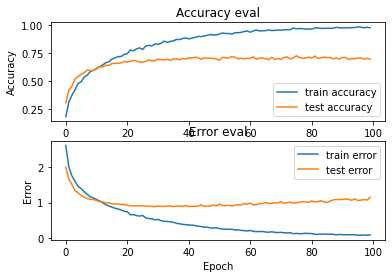

1250/1 - 1s - loss: 1.6678 - accuracy: 0.6984

Testing Accuracy: 0.6984
Target: 7, Predicted label: 9
Target: 9, Predicted label: 9
Target: 6, Predicted label: 6
Target: 1, Predicted label: 1
Target: 6, Predicted label: 6
Target: 5, Predicted label: 5
Target: 2, Predicted label: 2
Target: 9, Predicted label: 9
Target: 4, Predicted label: 4
Target: 1, Predicted label: 1
Target: 3, Predicted label: 3
Target: 3, Predicted label: 3
Target: 7, Predicted label: 7
Target: 1, Predicted label: 1
Target: 7, Predicted label: 2
Target: 2, Predicted label: 2
Target: 2, Predicted label: 9
Target: 5, Predicted label: 5
Target: 2, Predicted label: 2
Target: 4, Predicted label: 6
Target: 4, Predicted label: 8
Target: 3, Predicted label: 3
Target: 5, Predicted label: 9
Target: 6, Predicted label: 6
Target: 8, Predicted label: 8
Target: 9, Predicted label: 9
Target: 5, Predicted label: 5
Target: 1, Predicted label: 1
Target: 9, Predicted label: 9
Target: 4, Predicted label: 4
Target: 8, Predicted label: 

In [5]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "E:/Project (ML)/mfcc_data.json"


def load_data(data_path):

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["label"])
    return X, y


def plot_history(history):
    
    fig, axs = plt.subplots(2)
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):

    X, y = load_data(DATA_PATH)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):

    
    musicmodel = keras.Sequential()

   
    musicmodel.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    musicmodel.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    musicmodel.add(keras.layers.BatchNormalization())

   
    musicmodel.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    musicmodel.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    musicmodel.add(keras.layers.BatchNormalization())

   
    musicmodel.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    musicmodel.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    musicmodel.add(keras.layers.BatchNormalization())

    
    musicmodel.add(keras.layers.Flatten())
    musicmodel.add(keras.layers.Dense(64, activation='relu'))
    musicmodel.add(keras.layers.Dropout(0.3))

   
    musicmodel.add(keras.layers.Dense(10, activation='softmax'))

    return musicmodel


def predict(model, X, y):

    prediction = model.predict(X)

    
    predicted_index = np.argmax(prediction, axis=1)
    
    for t,p in zip(y, predicted_index): 
        print("Target: {}, Predicted label: {}".format(t, p))


if __name__ == "__main__":

    
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    
    ipshape= (X_train.shape[1], X_train.shape[2], 1)
    musicmodel = build_model(ipshape)

   
    opti = keras.optimizers.Adam(learning_rate=0.0001)
    musicmodel.compile(optimizer=opti,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    musicmodel.summary()

    hist = musicmodel.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=100)

   
    plot_history(hist)

    
    loss, acc = musicmodel.evaluate(X_test, y_test, verbose=2)
    print('\nTesting Accuracy:', acc)



    
    predict(musicmodel, X_test, y_test)